In [32]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from string import punctuation
import re

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('Mental_Health_FAQ.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [34]:
# import os
# for dirname, _, filenames in os.walk('full_Chat_data.CSV'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [35]:
# import os
# for dirname, _, filenames in os.walk('medquad.CSV'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [36]:
# import os
# for dirname, _, filenames in os.walk('train.CSV'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [43]:
nRowsRead = None # specify 'None' if want to read whole file
data_mental = pd.read_csv('Mental_Health_FAQ.csv', delimiter=',', nrows = nRowsRead)
data_mental.dataframeName = 'Mental_Health_FAQ.csv'
nRow, nCol = data_mental.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 98 rows and 3 columns


In [44]:
# nRowsRead = None # specify 'None' if want to read whole file
# data_alz = pd.read_csv('full_Chat_data.csv', delimiter=',', nrows = nRowsRead)
# data_alz.dataframeName = 'full_Chat_data.csv'
# nRow, nCol = data_alz.shape
# print(f'There are {nRow} rows and {nCol} columns')

In [45]:
# nRowsRead = None # specify 'None' if want to read whole file
# data_glaucoma = pd.read_csv('medquad.csv', delimiter=',', nrows = nRowsRead)
# data_glaucoma.dataframeName = 'medquad.csv'
# nRow, nCol = data_glaucoma.shape
# print(f'There are {nRow} rows and {nCol} columns')

In [46]:
# nRowsRead = None # specify 'None' if want to read whole file
# data_train = pd.read_csv('train.csv', delimiter=',', nrows = nRowsRead)
# data_train.dataframeName = 'train.csv'
# nRow, nCol = data_train.shape
# print(f'There are {nRow} rows and {nCol} columns')

In [16]:
# select_data_alz = data_alz[['Questions', 'Answers']]
# select_data_alz.head()

,Questions,Answers
0,What is Alzheimer’s Disease?,Alzheimer’s disease is the most common form of...
1,What causes Alzheimer's disease?,The fundamental causes of Alzheimer’s disease ...
2,What are the symptoms of Alzheimer's disease?,Early signs and symptoms of Alzheimer’s diseas...
3,Is Alzheimer's disease the same thing as demen...,Dementia is a syndrome and has many causes inc...
4,How common is Alzheimer's disease?,Approximately 50 million people worldwide are ...


In [47]:
select_data_mental = data_mental[['Questions', 'Answers']]
select_data_mental.head()

,Questions,Answers
0,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,Can people with mental illness recover?,"When healing from mental illness, early identi..."


In [48]:
# data_train.head()

In [18]:


# Assuming "data_glaucoma" is the name of your DataFrame containing the glaucoma dataset
# Selecting only the "question" and "answer" columns and renaming them
select_data_glaucoma = data_glaucoma[['question', 'answer']].rename(columns={'question': 'Questions', 'answer': 'Answers'})

# Displaying the selected and renamed columns
print(select_data_glaucoma)


                                               Questions  \
0                               What is (are) Glaucoma ?   
1                                 What causes Glaucoma ?   
2                    What are the symptoms of Glaucoma ?   
3                 What are the treatments for Glaucoma ?   
4                               What is (are) Glaucoma ?   
...                                                  ...   
16407  What is (are) Diabetic Neuropathies: The Nerve...   
16408  How to prevent Diabetic Neuropathies: The Nerv...   
16409  How to diagnose Diabetic Neuropathies: The Ner...   
16410  What are the treatments for Diabetic Neuropath...   
16411  What to do for Diabetic Neuropathies: The Nerv...   

                                                 Answers  
0      Glaucoma is a group of diseases that can damag...  
1      Nearly 2.7 million people have glaucoma, a lea...  
2      Symptoms of Glaucoma  Glaucoma can develop in ...  
3      Although open-angle glaucoma cannot 

In [49]:
# data = pd.concat([select_data_alz, select_data_mental, select_data_glaucoma, data_train], ignore_index=True)

In [50]:
data = data_mental

In [20]:
# data = pd.concat([data_alz, data_mental], ignore_index=True)

In [51]:
data.head()

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."


In [22]:
data.shape

(38609, 4)

In [43]:
data['Questions'] = data['Questions'].str.lower()

In [12]:
# data_alz['Questions'] = data_alz['Questions'].str.lower()

In [13]:
data_mental.head()

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."


In [14]:
data_alz.head()

,Unnamed: 0,Questions,Answers
0,0,What is Alzheimer’s Disease?,Alzheimer’s disease is the most common form of...
1,1,What causes Alzheimer's disease?,The fundamental causes of Alzheimer’s disease ...
2,2,What are the symptoms of Alzheimer's disease?,Early signs and symptoms of Alzheimer’s diseas...
3,3,Is Alzheimer's disease the same thing as demen...,Dementia is a syndrome and has many causes inc...
4,4,How common is Alzheimer's disease?,Approximately 50 million people worldwide are ...


In [15]:
data_mental.head()

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."


In [52]:
data.shape

(98, 3)

In [45]:
# Remove unnecessary characters
data['Questions'] = data['Questions'].str.replace('[^\w\s]', '')

C:\Users\psahu\AppData\Local\Temp\ipykernel_24860\774840892.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Questions'] = data['Questions'].str.replace('[^\w\s]', '')


In [46]:
# # Remove unnecessary characters
# data_mental['Questions'] = data_mental['Questions'].str.replace('[^\w\s]', '')

In [47]:
# # Handle missing values if any
# data.dropna(inplace=True)

In [1]:
data.head()

NameError: name 'data' is not defined

In [49]:
# # Handle missing values if any
# data_mental.dropna(inplace=True)

In [50]:
data['Intent'] = data['Questions']
questions_response_counts = data.groupby('Intent').size().reset_index(name='Count')

In [51]:
data.head()

,Questions,Answers,Intent
0,what is alzheimers disease,Alzheimer’s disease is the most common form of...,what is alzheimers disease
1,what causes alzheimers disease,The fundamental causes of Alzheimer’s disease ...,what causes alzheimers disease
2,what are the symptoms of alzheimers disease,Early signs and symptoms of Alzheimer’s diseas...,what are the symptoms of alzheimers disease
3,is alzheimers disease the same thing as dementia,Dementia is a syndrome and has many causes inc...,is alzheimers disease the same thing as dementia
4,how common is alzheimers disease,Approximately 50 million people worldwide are ...,how common is alzheimers disease


In [52]:
# data_mental['Intent'] = data_mental['Questions']
# questions_response_counts = data_mental.groupby('Intent').size().reset_index(name='Count')

In [53]:
# Exploratory Data Analysis
intent_counts = data['Questions'].value_counts()

In [54]:
# # Exploratory Data Analysis
# intent_counts = data_mental['Questions'].value_counts()

In [55]:
# # Visualize intent distribution
# fig = px.bar(x=intent_counts.index, y=intent_counts.values, labels={'x': 'Intents', 'y': 'Count'})
# fig.show()

In [56]:
# # Calculate average number of questions per intent
# avg_questions = data.groupby('Intent').size().mean()

# # Visualize average pattern count per intent
# fig = px.bar(x=questions_response_counts['Intent'], y=questions_response_counts['Count'],
#              labels={'x': 'Intents', 'y': 'Average Questions Count'})
# fig.show()

In [59]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame containing the 'Questions' and 'Intent' columns
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Questions'], data['Intent'], test_size=0.2, random_state=42)


In [61]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC
# from sklearn.metrics import classification_report

# def vectorize_text(X_train, X_test):
#     vectorizer = TfidfVectorizer()
#     X_train_vec = vectorizer.fit_transform(X_train)
#     X_test_vec = vectorizer.transform(X_test)
#     return X_train_vec, X_test_vec, vectorizer

# def train_model(X_train_vec, y_train):
#     model = LinearSVC()
#     model.fit(X_train_vec, y_train)
#     return model

# def evaluate_model(model, X_test_vec, y_test):
#     y_pred = model.predict(X_test_vec)
#     report = classification_report(y_test, y_pred)
#     return report, y_pred

# # Vectorize the text data
# X_train_vec, X_test_vec, vectorizer = vectorize_text(X_train, X_test)

# # Train the model
# model = train_model(X_train_vec, y_train)

# # Evaluate the model
# report, y_pred = evaluate_model(model, X_test_vec, y_test)
# print(report)

# # Visualize model performance
# metrics = ['precision', 'recall', 'f1-score', 'support']
# scores = classification_report(y_test, y_pred, output_dict=True)['weighted avg']

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [65]:
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC
# from sklearn.metrics import classification_report

# def attention(query, key, value):
#     """
#     Compute attention weights.
    
#     Args:
#         query (numpy.ndarray): Query vector with shape (query_dim,).
#         key (numpy.ndarray): Key vectors with shape (num_keys, key_dim).
#         value (numpy.ndarray): Value vectors with shape (num_keys, value_dim).
        
#     Returns:
#         numpy.ndarray: Attention weights with shape (num_keys,).
#     """
#     # Compute unnormalized attention scores
#     scores = np.dot(key, query)
    
#     # Normalize scores to obtain attention weights using softmax
#     attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=0)
    
#     return attention_weights

# def vectorize_text_with_attention(X_train, X_test):
#     # Vectorize text data
#     vectorizer = TfidfVectorizer()
#     X_train_vec = vectorizer.fit_transform(X_train)
#     X_test_vec = vectorizer.transform(X_test)
    
#     # Apply attention mechanism
#     attention_weights = []
#     for i in range(X_train_vec.shape[0]):
#         query = X_train_vec[i].toarray().flatten()  # Convert sparse matrix to dense array
#         key = X_train_vec.toarray()  # Convert entire X_train_vec to dense array
#         value = X_train_vec.toarray()  # Convert entire X_train_vec to dense array
#         attention_weight = attention(query, key, value)
#         attention_weights.append(attention_weight)
    
#     # Apply attention weights to X_train_vec and X_test_vec
#     X_train_vec_with_attention = np.multiply(X_train_vec.toarray(), np.array(attention_weights)[:,:,np.newaxis]).mean(axis=1)
#     X_test_vec_with_attention = np.multiply(X_test_vec.toarray(), np.array(attention_weights)[:,:,np.newaxis]).mean(axis=1)
    
#     return X_train_vec_with_attention, X_test_vec_with_attention, vectorizer

# # Vectorize the text data with attention mechanism
# X_train_vec_with_attention, X_test_vec_with_attention, vectorizer = vectorize_text_with_attention(X_train, X_test)

# # Train the model
# model = LinearSVC()
# model.fit(X_train_vec_with_attention, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test_vec_with_attention)
# report = classification_report(y_test, y_pred)
# print(report)



MemoryError: Unable to allocate 1.78 GiB for an array with shape (28077, 8529) and data type float64

In [73]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

def batch_vectorize_text(X, vectorizer):
    batch_size = 100  # Define the batch size
    num_batches = len(X) // batch_size + 1
    X_vec = []
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(X))
        X_batch = X[start_idx:end_idx]
        X_batch_vec = vectorizer.transform(X_batch)
        X_vec.append(X_batch_vec)
    return np.vstack(X_vec)

def vectorize_text_with_attention(X_train, X_test):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(X_train)
    X_train_vec = batch_vectorize_text(X_train, vectorizer)
    X_test_vec = batch_vectorize_text(X_test, vectorizer)
    return X_train_vec, X_test_vec, vectorizer

def train_model(X_train_vec, y_train):
    model = LinearSVC()
    model.fit(X_train_vec, y_train)  # Convert sparse matrix to dense array
    return model

def evaluate_model(model, X_test_vec, y_test):
    y_pred = model.predict(X_test_vec)
    report = classification_report(y_test, y_pred)
    return report, y_pred

# Vectorize the text data with attention mechanism
X_train_vec_with_attention, X_test_vec_with_attention, vectorizer = vectorize_text_with_attention(X_train, X_test)

# Train the model
model = train_model(X_train_vec_with_attention, y_train)

# Evaluate the model
report, y_pred = evaluate_model(model, X_test_vec_with_attention, y_test)
print(report)


ValueError: setting an array element with a sequence.

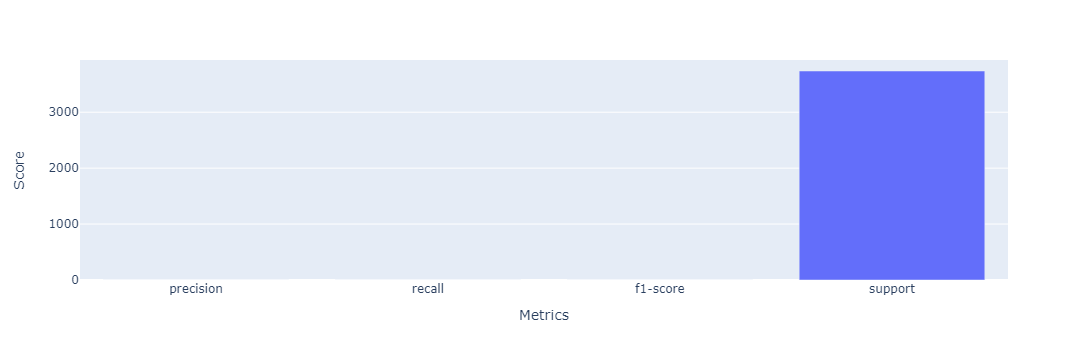

In [31]:
fig = px.bar(x=metrics, y=[scores[metric] for metric in metrics], labels={'x': 'Metrics', 'y': 'Score'})
fig.show()

In [64]:
exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")

print("Welcome to the Mental Health FAQ Chatbot!")
print("Ask a question or enter 'quit', 'pause', 'exit', 'goodbye', 'bye', 'later', or 'stop' to exit.")

while True:
    user_input = input("User: ")
    
    if user_input.lower() in exit_commands:
        print("Chatbot: Goodbye!")
        break
    
    # Vectorize user input
    user_input_vec = vectorizer.transform([user_input.lower()])
    
    # Predict the intent
    predicted_intent = model.predict(user_input_vec)[0]
    
    # Implement response generation mechanism based on predicted intent
    if predicted_intent in data['Questions'].values:
        response = data[data['Questions'] == predicted_intent]['Answers'].values[0]
    else:
        response = "Sorry, I don't have information about this topic."
    
    print("Chatbot:", response)

Welcome to the Mental Health FAQ Chatbot!
Ask a question or enter 'quit', 'pause', 'exit', 'goodbye', 'bye', 'later', or 'stop' to exit.


User:  exit


Chatbot: Goodbye!


	Answers
8	Just as there are different types of medications for physical illness, different treatment options are available for individuals with mental illness. Treatment works differently for different people. It is important to find what works best for you or your child.